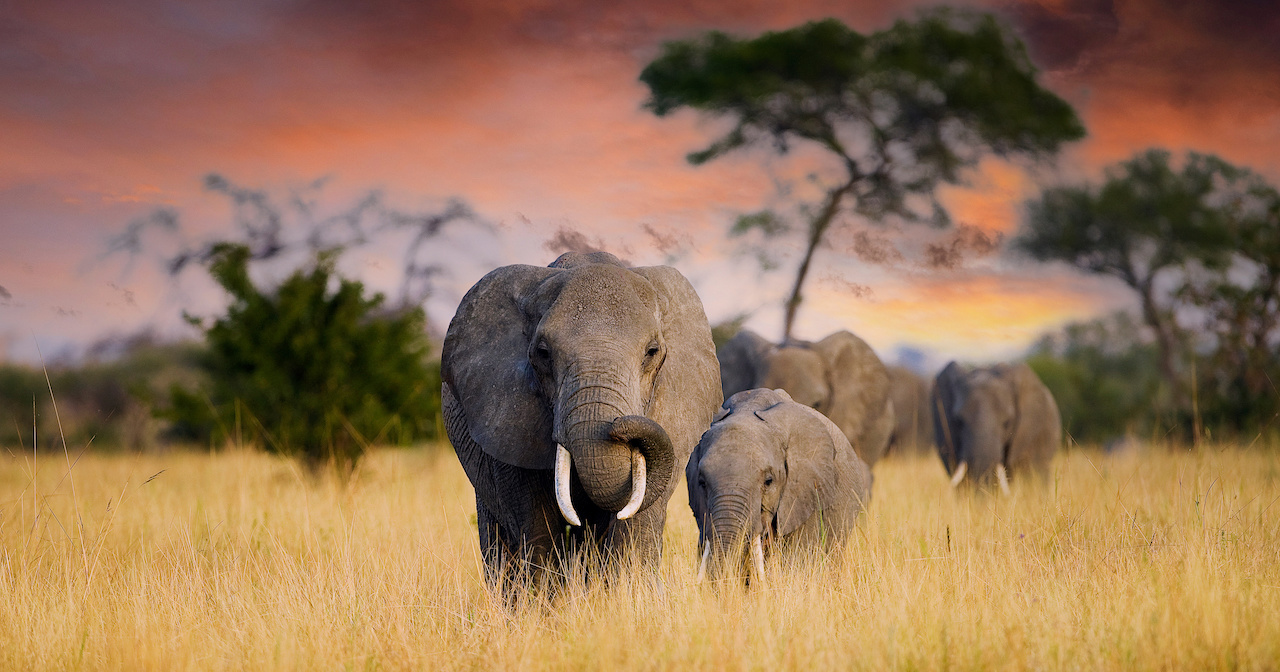
Photo by <a href="https://stock.adobe.com/contributor/19000/mat-hayward?load_type=author&prev_url=detail" >Mat Hayward</a> on Adobe Stock

# Phase 4 Project: *The Met Museum Ivory Art Classification Model*

### By Ryan Posternak and Harrison Carter

Flatiron School, Full-Time Live NYC<br>
Project Presentation Date: August 6th, 2022<br>
Instructor: Joseph Mata

## Goal: Identify whether a piece of artwork among the Met museum's art collection is made of ivory or not

<br>

# Overview and Business Understanding

<br>

# Data Understanding

<br>

# Sourcing the Data

### Import libraries, packages and modules

In [1]:
import numpy as np
import pandas as pd
import requests
import time
from PIL import Image
from io import BytesIO
import os
import shutil

### Connect to Met API

In [2]:
# API URL to obtain IDs of ivory objects
ivory_url = 'https://collectionapi.metmuseum.org/public/collection/v1/search?medium=Ivory&q=*'

# API URL to obtain IDs of (expected to be) non-ivory ceramic objects
non_ivory_url = 'https://collectionapi.metmuseum.org/public/collection/v1/search?medium=Ceramics&hasImages=true&q=*'

# Ivory objects request
ivory_r = requests.get(ivory_url)

# Non-ivory objects request
non_ivory_r = requests.get(non_ivory_url)

ivory_r.status_code, non_ivory_r.status_code

(200, 200)

In [3]:
# Retrieve objectIds
ivory_objectIDs = ivory_r.json()['objectIDs']
non_ivory_objectIDs = non_ivory_r.json()['objectIDs']


print(f"Number of ivory objects: {len(ivory_objectIDs)}")
print(f"Number of ceramic objects: {len(non_ivory_objectIDs)}")

Number of ivory objects: 5975
Number of ceramic objects: 25603


In [4]:
# Let's view the full data on one museum art piece (the first ivory object in our list)
url = 'https://collectionapi.metmuseum.org/public/collection/v1/objects/'

requests.get(url + str(ivory_objectIDs[0])).json()

{'objectID': 248694,
 'isHighlight': False,
 'accessionNumber': '12.229.23b',
 'accessionYear': '1912',
 'isPublicDomain': True,
 'primaryImage': 'https://images.metmuseum.org/CRDImages/gr/original/sf1222923b.jpg',
 'primaryImageSmall': 'https://images.metmuseum.org/CRDImages/gr/web-large/sf1222923b.jpg',
 'additionalImages': [],
 'constituents': None,
 'department': 'Greek and Roman Art',
 'objectName': 'Relief of a duck',
 'title': 'Relief of a duck',
 'culture': 'Roman',
 'period': 'Early Imperial',
 'dynasty': '',
 'reign': '',
 'portfolio': '',
 'artistRole': '',
 'artistPrefix': '',
 'artistDisplayName': '',
 'artistDisplayBio': '',
 'artistSuffix': '',
 'artistAlphaSort': '',
 'artistNationality': '',
 'artistBeginDate': '',
 'artistEndDate': '',
 'artistGender': '',
 'artistWikidata_URL': '',
 'artistULAN_URL': '',
 'objectDate': '1st century A.D.',
 'objectBeginDate': 1,
 'objectEndDate': 99,
 'medium': 'Bone',
 'dimensions': '1 13/16 × 5/8 × 4 3/16 in. (4.7 × 1.6 × 10.6 cm)',

### Create container lists with selected attributes

In [6]:
# Initialize lists
ivory_primaryImageSmall_urls = []
ivory_titles = []
ivory_objectNames = []
ivory_mediums = []
ivory_classifications = []
ivory_departments = []
ivory_cultures = []
ivory_periods = []
ivory_objectDates = []

# Compile containers
attribute_containers = [ivory_primaryImageSmall_urls, ivory_titles, ivory_objectNames, ivory_mediums, 
                        ivory_classifications, ivory_departments, ivory_cultures, ivory_periods, ivory_objectDates]

# Compile key names of attributes
attributes = ['primaryImageSmall', 'title', 'objectName', 'medium', 
              'classification', 'department', 'culture', 'period', 'objectDate']

# Execute API requests
objects_url = 'https://collectionapi.metmuseum.org/public/collection/v1/objects/'
if os.path.isfile('data/merged_df.csv') == False:  # Prevent running duplicate API requests
    for objectID in ivory_objectIDs:
        r = requests.get(objects_url + str(objectID))
        for attribute_container, attribute in zip(attribute_containers, attributes):
            try:
                attribute_container.append(r.json()[attribute])
            except:
                attribute_container.append(np.nan)  # Some keys are missing on select objects
        time.sleep(1/160)  # Throttle API request rate to conform with API documentation

### Create dataframe of ivory art pieces

In [7]:
ivory_df = pd.DataFrame(ivory_objectIDs, columns=['Object_ID'])

ivory_df['Image_URL'] = ivory_primaryImageSmall_urls
ivory_df['Title'] = ivory_titles
ivory_df['Object_Name'] = ivory_objectNames
ivory_df['Medium'] = ivory_mediums
ivory_df['Classification'] = ivory_classifications
ivory_df['Department'] = ivory_departments
ivory_df['Culture'] = ivory_cultures
ivory_df['Period'] = ivory_periods
ivory_df['Object_Date'] = ivory_objectDates

# Ivory art pieces will have class labels of 1
ivory_df['Target'] = 1

ivory_df.replace(to_replace='', value=np.nan, inplace=True)

ivory_df

,Object_ID,Image_URL,Title,Object_Name,Medium,Classification,Department,Culture,Period,Object_Date,Target
0,248694,https://images.metmuseum.org/CRDImages/gr/web-...,Relief of a duck,Relief of a duck,Bone,"Miscellaneous-Bone, Ivory",Greek and Roman Art,Roman,Early Imperial,1st century A.D.,1
1,248695,https://images.metmuseum.org/CRDImages/gr/web-...,Relief of a child,Relief of a child,Bone,"Miscellaneous-Bone, Ivory",Greek and Roman Art,NaN,NaN,NaN,1
2,257575,https://images.metmuseum.org/CRDImages/gr/web-...,Eye inlays,Eye inlays,"Bone, ivory","Miscellaneous-Bone, Ivory",Greek and Roman Art,NaN,NaN,NaN,1
3,25138,NaN,Dirk with Sheath,Dirk with sheath,"Steel, ivory, leather, gold",Daggers,Arms and Armor,French,NaN,16th century,1
4,25137,NaN,Cinquedea,Cinquedea,"Steel, brass, ivory, gold, latten",Daggers,Arms and Armor,Italian,NaN,1525–50,1
...,...,...,...,...,...,...,...,...,...,...,...
5970,325668,https://images.metmuseum.org/CRDImages/an/web-...,Furniture plaque carved in relief with a griff...,Relief,Ivory,NaN,Ancient Near Eastern Art,Assyrian,Neo-Assyrian,ca. 9th–8th century B.C.,1
5971,325567,https://images.metmuseum.org/CRDImages/an/web-...,Furniture plaque carved in relief with a femal...,Relief,Ivory,NaN,Ancient Near Eastern Art,Assyrian,Neo-Assyrian,ca. 9th–8th century B.C.,1
5972,325571,https://images.metmuseum.org/CRDImages/an/web-...,Openwork furniture plaque with the head of a f...,Relief,Ivory,NaN,Ancient Near Eastern Art,Assyrian,Neo-Assyrian,ca. 9th–8th century B.C.,1
5973,465946,https://images.metmuseum.org/CRDImages/cl/web-...,Icon with Saint Demetrios,Plaque,Ivory,Ivories,The Cloisters,Byzantine,NaN,950–1000,1


In [8]:
# How many of the ivory objects have valid (small) image URLs?
num_ivory_objects_with_image = ivory_df.shape[0] - ivory_df.Image_URL.isna().sum()
num_ivory_objects_with_image

4617

In [9]:
# Choose 5,975 random objectIds from the non_ivory_objectIDs list
np.random.seed(10)
selected_non_ivory_objectIDs = np.random.choice(non_ivory_objectIDs, size=5,975, replace=False)
len(selected_non_ivory_objectIDs)

6000

### Repeat steps above to create dataframe of non-ivory art pieces

In [10]:
non_ivory_primaryImageSmall_urls = []
non_ivory_titles = []
non_ivory_objectNames = []
non_ivory_mediums = []
non_ivory_classifications = []
non_ivory_departments = []
non_ivory_cultures = []
non_ivory_periods = []
non_ivory_objectDates = []

attribute_containers = [non_ivory_primaryImageSmall_urls, non_ivory_titles, non_ivory_objectNames, 
                        non_ivory_mediums, non_ivory_classifications, non_ivory_departments, non_ivory_cultures, 
                        non_ivory_periods, non_ivory_objectDates]

attributes = ['primaryImageSmall', 'title', 'objectName', 'medium', 
              'classification', 'department', 'culture', 'period', 'objectDate']


objects_url = 'https://collectionapi.metmuseum.org/public/collection/v1/objects/'

if os.path.isfile('data/merged_df.csv') == False:  # Prevent running duplicate API requests
    for objectID in selected_non_ivory_objectIDs:
        r = requests.get(objects_url + str(objectID))
        for attribute_container, attribute in zip(attribute_containers, attributes):
            try:
                attribute_container.append(r.json()[attribute])
            except:
                attribute_container.append(np.nan)
        time.sleep(1/160)

In [11]:
non_ivory_df = pd.DataFrame(selected_non_ivory_objectIDs, columns=['Object_ID'])

non_ivory_df['Image_URL'] = non_ivory_primaryImageSmall_urls
non_ivory_df['Title'] = non_ivory_titles
non_ivory_df['Object_Name'] = non_ivory_objectNames
non_ivory_df['Medium'] = non_ivory_mediums
non_ivory_df['Classification'] = non_ivory_classifications
non_ivory_df['Department'] = non_ivory_departments
non_ivory_df['Culture'] = non_ivory_cultures
non_ivory_df['Period'] = non_ivory_periods
non_ivory_df['Object_Date'] = non_ivory_objectDates

# Non-ivory art pieces will have class labels of 0
non_ivory_df['Target'] = 0

# Remove objects without valid (small) image URLs
non_ivory_df.replace(to_replace='', value=np.nan, inplace=True)
non_ivory_df.dropna(subset=['Image_URL'], inplace=True)

non_ivory_df

,Object_ID,Image_URL,Title,Object_Name,Medium,Classification,Department,Culture,Period,Object_Date,Target
0,186685,https://images.metmuseum.org/CRDImages/es/web-...,Bowl with Saint Francis receiving the stigmata,Bowl,"Maiolica (tin-glazed earthenware), lustered",Ceramics-Pottery,European Sculpture and Decorative Arts,NaN,NaN,16th century,0
1,194344,https://images.metmuseum.org/CRDImages/es/web-...,Plate,Plate,Faience (tin-glazed earthenware),Ceramics-Pottery,European Sculpture and Decorative Arts,NaN,NaN,1730–1800,0
2,47555,https://images.metmuseum.org/CRDImages/as/web-...,Plate,Plate,Porcelain,Ceramics,Asian Art,China,Ming dynasty (1368–1644),NaN,0
4,48435,https://images.metmuseum.org/CRDImages/as/web-...,Model of a stove,Model of a stove,Earthenware with green glaze,Tomb Pottery,Asian Art,China,Han dynasty (206 B.C.–A.D. 220),1st–2nd century,0
6,695250,https://images.metmuseum.org/CRDImages/md/web-...,Fragment,Fragment,"Glass, ceramic",Glass-Vessels,Medieval Art,European or Middle Eastern,NaN,ca. 1150–ca. 1250,0
...,...,...,...,...,...,...,...,...,...,...,...
5995,694352,https://images.metmuseum.org/CRDImages/md/web-...,Fragment,Fragment,"Glass, ceramic",Glass-Vessels,Medieval Art,European or Middle Eastern,NaN,ca. 1150–ca. 1250,0
5996,187850,https://images.metmuseum.org/CRDImages/es/web-...,Fruit dish,Fruit dish,Tin-glazed earthenware,Ceramics-Pottery,European Sculpture and Decorative Arts,NaN,NaN,18th century,0
5997,62536,https://images.metmuseum.org/CRDImages/as/web-...,Covered Bowl,Covered bowl,Porcelain with polychrome glaze (Kairakuen ware),Ceramics,Asian Art,Japan,Edo (1615–1868) or Meiji period (1868–1912),19th century,0
5998,63231,https://images.metmuseum.org/CRDImages/as/web-...,Teabowl,Teabowl,"Roughly moulded, showing wheelmarks; fawn-colo...",Ceramics,Asian Art,Japan,Edo period (1615–1868),ca. 1825,0


### Concatenate dataframes

In [99]:
merged_df = pd.concat([ivory_df, non_ivory_df], ignore_index=True)
merged_df

,Object_ID,Image_URL,Title,Object_Name,Medium,Classification,Department,Culture,Period,Object_Date,Target
0,248694,https://images.metmuseum.org/CRDImages/gr/web-...,Relief of a duck,Relief of a duck,Bone,"Miscellaneous-Bone, Ivory",Greek and Roman Art,Roman,Early Imperial,1st century A.D.,1
1,248695,https://images.metmuseum.org/CRDImages/gr/web-...,Relief of a child,Relief of a child,Bone,"Miscellaneous-Bone, Ivory",Greek and Roman Art,NaN,NaN,NaN,1
2,257575,https://images.metmuseum.org/CRDImages/gr/web-...,Eye inlays,Eye inlays,"Bone, ivory","Miscellaneous-Bone, Ivory",Greek and Roman Art,NaN,NaN,NaN,1
3,25138,NaN,Dirk with Sheath,Dirk with sheath,"Steel, ivory, leather, gold",Daggers,Arms and Armor,French,NaN,16th century,1
4,25137,NaN,Cinquedea,Cinquedea,"Steel, brass, ivory, gold, latten",Daggers,Arms and Armor,Italian,NaN,1525–50,1
...,...,...,...,...,...,...,...,...,...,...,...
11314,694352,https://images.metmuseum.org/CRDImages/md/web-...,Fragment,Fragment,"Glass, ceramic",Glass-Vessels,Medieval Art,European or Middle Eastern,NaN,ca. 1150–ca. 1250,0
11315,187850,https://images.metmuseum.org/CRDImages/es/web-...,Fruit dish,Fruit dish,Tin-glazed earthenware,Ceramics-Pottery,European Sculpture and Decorative Arts,NaN,NaN,18th century,0
11316,62536,https://images.metmuseum.org/CRDImages/as/web-...,Covered Bowl,Covered bowl,Porcelain with polychrome glaze (Kairakuen ware),Ceramics,Asian Art,Japan,Edo (1615–1868) or Meiji period (1868–1912),19th century,0
11317,63231,https://images.metmuseum.org/CRDImages/as/web-...,Teabowl,Teabowl,"Roughly moulded, showing wheelmarks; fawn-colo...",Ceramics,Asian Art,Japan,Edo period (1615–1868),ca. 1825,0


In [100]:
print('Before preprocessing:' + '\n')

# Search for duplicate Object_IDs
num_dup_IDs = merged_df.loc[merged_df.duplicated(subset='Object_ID', keep=False)].shape[0]
print(str(num_dup_IDs) + ' duplicate Object_IDs')

# Remove from dataframe (keep first occurrence)
dup_ID_indexes = merged_df.loc[merged_df.duplicated(subset='Object_ID', keep=False)].index
merged_df = merged_df.drop(dup_ID_indexes)

# Search for NaN Image_URLs
num_NaN_Image_URLs = merged_df.loc[merged_df['Image_URL'].isna()].shape[0]
print(str(num_NaN_Image_URLs) + ' null Image_URLs')

# Remove from dataframe
NaN_Image_URL_indexes = merged_df.loc[merged_df['Image_URL'].isna()].index
merged_df = merged_df.drop(NaN_Image_URL_indexes)

# Search for duplicate Image_URLs
num_dup_Image_URLs = merged_df.loc[merged_df.duplicated(subset='Image_URL')].shape[0]
print(str(num_dup_Image_URLs) + ' duplicate Image_URLs')

# Remove from dataframe (keep first occurrence)
dup_Image_URL_indexes = merged_df.loc[merged_df.duplicated(subset='Image_URL')].index
merged_df = merged_df.drop(dup_Image_URL_indexes)

print('-'*30)
print('After preprocessing:' + '\n')
print(str(merged_df.loc[merged_df.duplicated(subset='Object_ID', keep=False)].shape[0]) + ' duplicate Object_IDs')
print(str(merged_df.loc[merged_df['Image_URL'].isna()].shape[0]) + ' null Image_URLs')
print(str(merged_df.loc[merged_df.duplicated(subset='Image_URL')].shape[0]) + ' duplicate Image_URLs')

Before preprocessing:

22 duplicate Object_IDs
1358 null Image_URLs
160 duplicate Image_URLs
------------------------------
After preprocessing:

0 duplicate Object_IDs
0 null Image_URLs
0 duplicate Image_URLs


In [101]:
merged_df

,Object_ID,Image_URL,Title,Object_Name,Medium,Classification,Department,Culture,Period,Object_Date,Target
0,248694,https://images.metmuseum.org/CRDImages/gr/web-...,Relief of a duck,Relief of a duck,Bone,"Miscellaneous-Bone, Ivory",Greek and Roman Art,Roman,Early Imperial,1st century A.D.,1
1,248695,https://images.metmuseum.org/CRDImages/gr/web-...,Relief of a child,Relief of a child,Bone,"Miscellaneous-Bone, Ivory",Greek and Roman Art,NaN,NaN,NaN,1
2,257575,https://images.metmuseum.org/CRDImages/gr/web-...,Eye inlays,Eye inlays,"Bone, ivory","Miscellaneous-Bone, Ivory",Greek and Roman Art,NaN,NaN,NaN,1
10,31163,https://images.metmuseum.org/CRDImages/aa/web-...,Sword (Yatagan) with Scabbard,Sword (Yatagan) with scabbard,"Steel, ivory, copper, gold, coral, emeralds",Swords,Arms and Armor,Turkish,NaN,18th–19th century,1
12,31164,https://images.metmuseum.org/CRDImages/aa/web-...,Sword (Yatagan) with Scabbard,Sword (Yatagan) with scabbard,"Steel, silver, ivory, copper, coral",Swords,Arms and Armor,Turkish,NaN,18th–19th century,1
...,...,...,...,...,...,...,...,...,...,...,...
11314,694352,https://images.metmuseum.org/CRDImages/md/web-...,Fragment,Fragment,"Glass, ceramic",Glass-Vessels,Medieval Art,European or Middle Eastern,NaN,ca. 1150–ca. 1250,0
11315,187850,https://images.metmuseum.org/CRDImages/es/web-...,Fruit dish,Fruit dish,Tin-glazed earthenware,Ceramics-Pottery,European Sculpture and Decorative Arts,NaN,NaN,18th century,0
11316,62536,https://images.metmuseum.org/CRDImages/as/web-...,Covered Bowl,Covered bowl,Porcelain with polychrome glaze (Kairakuen ware),Ceramics,Asian Art,Japan,Edo (1615–1868) or Meiji period (1868–1912),19th century,0
11317,63231,https://images.metmuseum.org/CRDImages/as/web-...,Teabowl,Teabowl,"Roughly moulded, showing wheelmarks; fawn-colo...",Ceramics,Asian Art,Japan,Edo period (1615–1868),ca. 1825,0


In [44]:
# Save dataframe as a csv file

if os.path.isfile('data/merged_df.csv') == False:
    merged_df.to_csv('data/merged_df.csv')
else:
    merged_df = pd.read_csv('data/merged_df.csv', index_col=0)

In [123]:
merged_df.Medium.value_counts()[:20]

Ivory                                           1382
Watercolor on ivory                              562
Hard-paste porcelain                             532
Ceramic                                          425
Soft-paste porcelain                             338
Earthenware                                      237
Pottery                                          197
Tin-glazed earthenware                           177
Bone                                             140
Bone; incised and inlaid with paint              125
Glass, ceramic                                   103
Pottery fragment with ink inscription             86
Ceramic, pigment                                  85
Porcelain                                         84
Maiolica (tin-glazed earthenware)                 78
Faience (tin-glazed earthenware)                  68
Earthenware; glazed                               61
Lead-glazed earthenware                           56
Elephant ivory                                

In [152]:
for index in np.random.choice(indexes_to_keep, size=3, replace=False):
    print(index)

5247
5949
1745


916


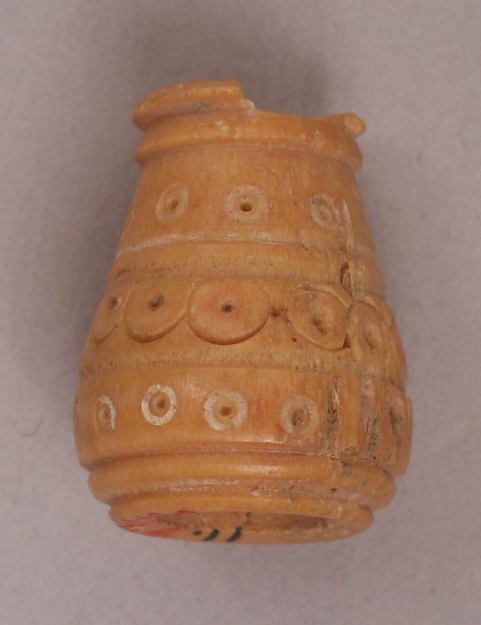

2518


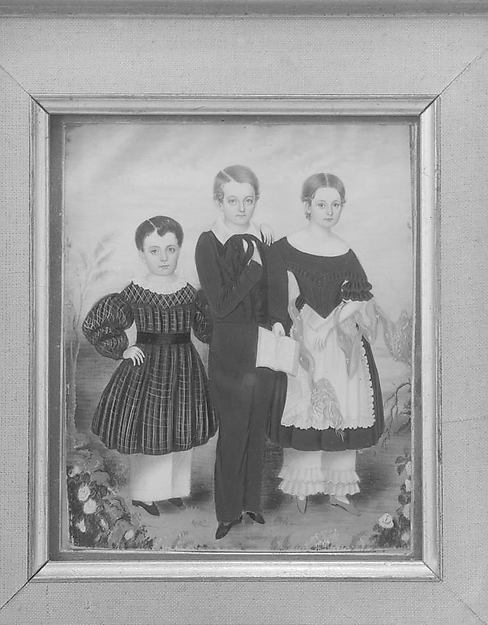

KeyError: 780

In [162]:
ivory_indexes_to_keep = merged_df.loc[(merged_df.Medium == 'Ivory') | 
              (merged_df.Medium == 'Bone') | 
              (merged_df.Medium == 'Bone, ivory') | 
              (merged_df.Medium == 'Elephant ivory')
             ].index

ivory_indexes_to_drop = [index for index in ivory_df.index if index not in indexes_to_keep]

for index in np.random.choice(ivory_indexes_to_drop, size=3, replace=False):
    test = requests.get(merged_df.loc[index].Image_URL)
    img_test = Image.open(BytesIO(test.content))
    print(index)
    display(img_test)

In [120]:
# merged_df.loc[(merged_df.Medium == 'Ivory') | (merged_df.Medium == 'Bone') | (merged_df.Medium == 'Bone, ivory')]
merged_df.loc[(merged_df.Medium == 'Bone; carved')]

,Object_ID,Image_URL,Title,Object_Name,Medium,Classification,Department,Culture,Period,Object_Date,Target
894,446190,https://images.metmuseum.org/CRDImages/is/web-...,Panel,Panel,Bone; carved,Ivories and Bone,Islamic Art,NaN,NaN,9th–10th century,1
2020,449524,https://images.metmuseum.org/CRDImages/is/web-...,Plaque,Plaque,Bone; carved,Ivories and Bone,Islamic Art,NaN,NaN,8th–9th century,1
2652,444841,https://images.metmuseum.org/CRDImages/is/web-...,Bead,Bead,Bone; carved,Ivories and Bone,Islamic Art,NaN,NaN,30 B.C.–A.D. 364,1
2653,444846,https://images.metmuseum.org/CRDImages/is/web-...,Bead or Spindle Whorl,Bead or spindle whorl,Bone; carved,Ivories and Bone,Islamic Art,NaN,NaN,30 B.C.–A.D. 364,1
2659,449530,https://images.metmuseum.org/CRDImages/is/web-...,Plaque,Plaque,Bone; carved,Ivories and Bone,Islamic Art,NaN,NaN,6th century,1
2660,449525,https://images.metmuseum.org/CRDImages/is/web-...,Plaque,Plaque,Bone; carved,Ivories and Bone,Islamic Art,NaN,NaN,8th–9th century,1
2661,449527,https://images.metmuseum.org/CRDImages/is/web-...,Plaque,Plaque,Bone; carved,Ivories and Bone,Islamic Art,NaN,NaN,6th–7th century,1
2662,449528,https://images.metmuseum.org/CRDImages/is/web-...,Plaque,Plaque,Bone; carved,Ivories and Bone,Islamic Art,NaN,NaN,7th–8th century,1
2663,449529,https://images.metmuseum.org/CRDImages/is/web-...,Plaque,Plaque,Bone; carved,Ivories and Bone,Islamic Art,NaN,NaN,6th–7th century,1
2664,449522,https://images.metmuseum.org/CRDImages/is/web-...,Plaque,Plaque,Bone; carved,Ivories and Bone,Islamic Art,NaN,NaN,7th–8th century,1


In [ ]:
ivory_indexes = merged_df.loc[merged_df['Target'] == 1].index
non_ivory_indexes = merged_df.loc[merged_df['Target'] == 0].index



In [46]:
# Examine distribution of target labels
merged_df.Target.value_counts()

0    5247
1    4532
Name: Target, dtype: int64

In [47]:
merged_df.iloc[7999].Image_URL

'https://images.metmuseum.org/CRDImages/es/web-large/DP-15275-085.jpg'

In [48]:
ivory_indexes = merged_df.loc[merged_df['Target'] == 1].index
non_ivory_indexes = merged_df.loc[merged_df['Target'] == 0].index

# Sanity check
ivory_indexes.shape[0] + non_ivory_indexes.shape[0] == merged_df.shape[0]

True

In [50]:
len([name for name in os.listdir('data/images/ivory') if not name.endswith('checkpoints')])

0

In [33]:
merged_df.loc[merged_df.Object_ID == 98264]

,Object_ID,Image_URL,Title,Object_Name,Medium,Classification,Department,Culture,Period,Object_Date,Target
149,98264,https://images.metmuseum.org/CRDImages/ci/web-...,Parasol,Parasol,"silk, ivory, metal",NaN,Costume Institute,French,NaN,ca. 1855,1


In [55]:
ivory_dir_len = len([name for name in os.listdir('data/images/ivory') if not name.endswith('checkpoints')])

unidentified_ivory_images = []
if ivory_dir_len == 0:
    for index in ivory_indexes:
        try:
            response = requests.get(merged_df.Image_URL.iloc[index])
            img = Image.open(BytesIO(response.content))
            img.save('data/images/ivory/ivory_' + str(merged_df.iloc[index]['Object_ID']) + '.jpg')
        except:
            unidentified_ivory_images.append(index)
        
unidentified_ivory_images   # [2216, 2743, 2917, 5428, 5466]

[2216, 2743, 2917, 5428, 5466]

In [56]:
unidentified_ivory_images

[2216, 2743, 2917, 5428, 5466]

In [ ]:
non_ivory_dir_len = len([name for name in os.listdir('data/images/non_ivory') if not name.endswith('checkpoints')])

unidentified_non_ivory_images = []
if non_ivory_dir_len == 0:
    for index in non_ivory_indexes:
        try:
            response = requests.get(merged_df.Image_URL.iloc[index])
            img = Image.open(BytesIO(response.content))
            img.save('data/images/ivory/non_ivory_' + str(merged_df.iloc[index]['Object_ID']) + '.jpg')
        except:
            unidentified_non_ivory_images.append(index)

In [69]:
merged_df.loc[merged_df.Object_ID == 257575]

,Object_ID,Image_URL,Title,Object_Name,Medium,Classification,Department,Culture,Period,Object_Date,Target
2,257575,https://images.metmuseum.org/CRDImages/gr/web-...,Eye inlays,Eye inlays,"Bone, ivory","Miscellaneous-Bone, Ivory",Greek and Roman Art,NaN,NaN,NaN,1


In [68]:
merged_df.iloc[2].Image_URL

'https://images.metmuseum.org/CRDImages/gr/web-large/sf141301c.jpg'

In [79]:
merged_df.loc[(merged_df.Medium == 'Ivory') | (merged_df.Medium == 'Bone') | (merged_df.Medium == 'Bone, ivory')]

,Object_ID,Image_URL,Title,Object_Name,Medium,Classification,Department,Culture,Period,Object_Date,Target
0,248694,https://images.metmuseum.org/CRDImages/gr/web-...,Relief of a duck,Relief of a duck,Bone,"Miscellaneous-Bone, Ivory",Greek and Roman Art,Roman,Early Imperial,1st century A.D.,1
1,248695,https://images.metmuseum.org/CRDImages/gr/web-...,Relief of a child,Relief of a child,Bone,"Miscellaneous-Bone, Ivory",Greek and Roman Art,NaN,NaN,NaN,1
2,257575,https://images.metmuseum.org/CRDImages/gr/web-...,Eye inlays,Eye inlays,"Bone, ivory","Miscellaneous-Bone, Ivory",Greek and Roman Art,NaN,NaN,NaN,1
16,31064,https://images.metmuseum.org/CRDImages/aa/web-...,Sword with Scabbard,Sword with scabbard,Ivory,Swords,Arms and Armor,Batak,NaN,16th–19th century,1
72,34077,https://images.metmuseum.org/CRDImages/aa/web-...,Hilt of a Dagger,Hilt of a dagger,Ivory,Daggers,Arms and Armor,"possibly Italian, Venice",NaN,ca. 1300,1
...,...,...,...,...,...,...,...,...,...,...,...
5969,325569,https://images.metmuseum.org/CRDImages/an/web-...,Openwork furniture plaque with a falcon-headed...,Relief,Ivory,NaN,Ancient Near Eastern Art,Assyrian,Neo-Assyrian,ca. 9th–8th century B.C.,1
5970,325668,https://images.metmuseum.org/CRDImages/an/web-...,Furniture plaque carved in relief with a griff...,Relief,Ivory,NaN,Ancient Near Eastern Art,Assyrian,Neo-Assyrian,ca. 9th–8th century B.C.,1
5971,325567,https://images.metmuseum.org/CRDImages/an/web-...,Furniture plaque carved in relief with a femal...,Relief,Ivory,NaN,Ancient Near Eastern Art,Assyrian,Neo-Assyrian,ca. 9th–8th century B.C.,1
5972,325571,https://images.metmuseum.org/CRDImages/an/web-...,Openwork furniture plaque with the head of a f...,Relief,Ivory,NaN,Ancient Near Eastern Art,Assyrian,Neo-Assyrian,ca. 9th–8th century B.C.,1


In [98]:
merged_df.iloc[0].Image_URL

'https://images.metmuseum.org/CRDImages/gr/web-large/sf1222923b.jpg'

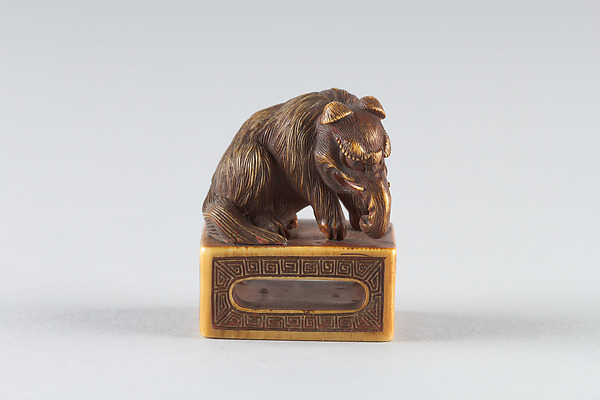

In [203]:
test = requests.get(merged_df.Image_URL.loc[4230])
img_test = Image.open(BytesIO(test.content))
img_test

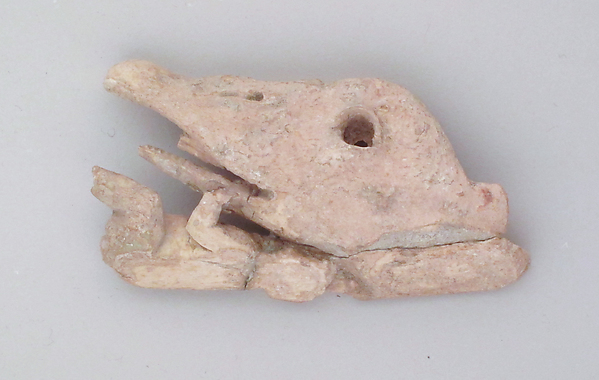

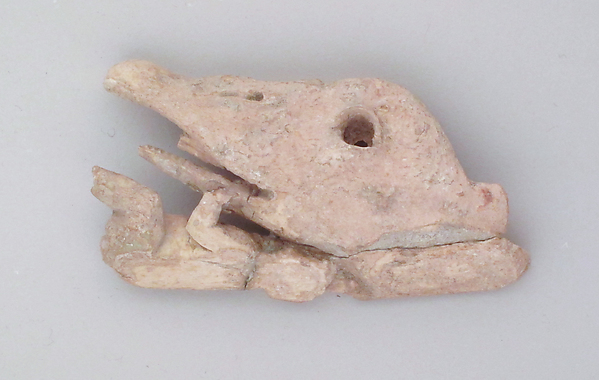

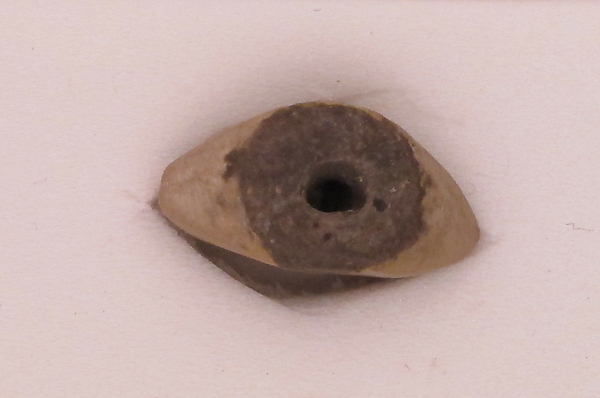

In [95]:
for index in [0, 1, 2]:
    test = requests.get(merged_df.Image_URL.iloc[index])
    img_test = Image.open(BytesIO(test.content))
    display(img_test)

In [86]:
merged_df.Medium.value_counts()[:10]

Ivory                                  1382
Watercolor on ivory                     562
Hard-paste porcelain                    532
Ceramic                                 425
Soft-paste porcelain                    338
Earthenware                             237
Pottery                                 197
Tin-glazed earthenware                  177
Bone                                    140
Bone; incised and inlaid with paint     125
Name: Medium, dtype: int64

In [113]:
# merged_df.loc[merged_df.Object_ID == 464219]

,Object_ID,Image_URL,Title,Object_Name,Medium,Classification,Department,Culture,Period,Object_Date,Target
2590,464219,https://images.metmuseum.org/CRDImages/md/web-...,Comb,Comb,Elephant ivory,Ivories-Elephant,Medieval Art,European (Medieval style),NaN,19th century,1


In [206]:
merged_df.loc[2649]

Object_ID                                                    443099
Image_URL         https://images.metmuseum.org/CRDImages/is/web-...
Title                                            Case for Two Pipes
Object_Name                                               Pipe case
Medium            Carved ivory; mounted over wood frame; brass m...
Classification                                     Ivories and Bone
Department                                              Islamic Art
Culture                                                         NaN
Period                                                          NaN
Object_Date                                            17th century
Target                                                            1
Name: 2649, dtype: object